https://github.com/Seb943/Markov4Tennis/tree/master

https://medium.com/analytics-vidhya/modelizing-a-tennis-match-with-markov-chains-b59ca2b5f5bf

Can we characterize a Tennis match as a Hidden Markov Model?

This repo helps modelize a tennis match with the help of markov chains. \
Because of the particular structure of tennis matches, i.e. imbricated sequential models which 
are perfectly described with Hierarchical Hidden Markov Models (HHMM), we only need two inputs - the probabilities of each player winning a point.\
Given our only two inputs - the probabilities of each player winning a point on his serve we can modelize a game and a tie-break first, then we can use these modelizations to modelize a set, and finally we can use the set model to modelize a whole match.
The match model is "hidden" because:\
    - We don't observe why a point was won (e.g., unforced error, ace, fatigue).\
    - The observed outcome (win/loss of point) is a result of latent variables (skill, momentum, psychological state).\
NB : As 30-30 and 40-40 are strictly the same Markov states inside a game, we implemented a unique state called
30-30(DEUCE). Same for 6-6, 8-8, 10-10, etc... in tie-breaks.\
NB2 : Player 1 is serving first at the beginning of the match. 

In [1]:
# Import tennis-specific functions and score objects
from functions import (
    resGAME, resTIE, resSET, resMATCH, determiMM,
    s0game, s0tb, s0set, s0match
)

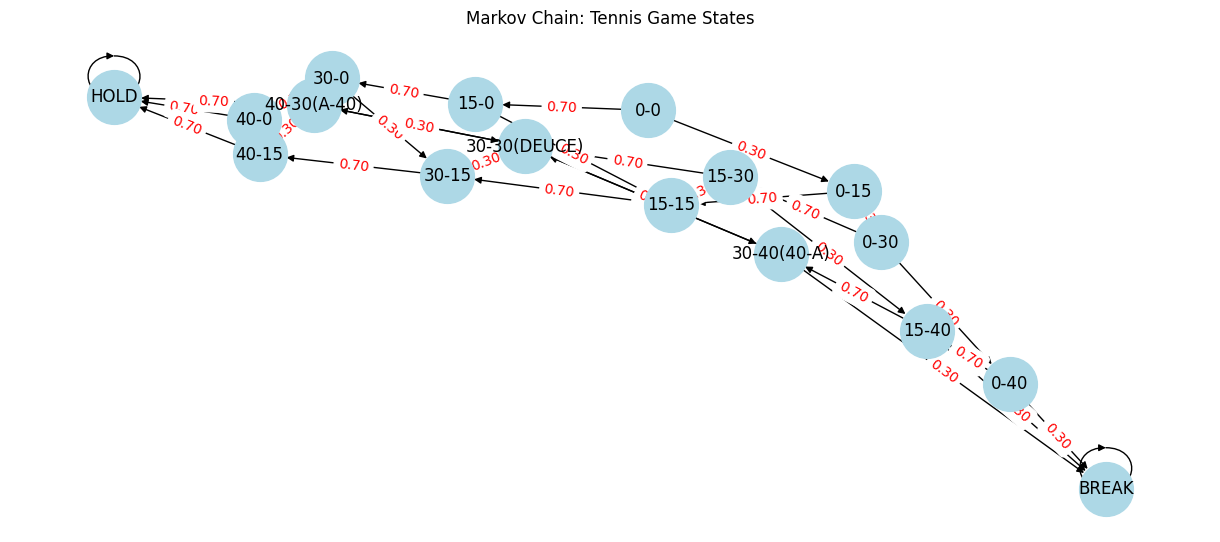

In [2]:
# I - Compute game winning probabilities if score is s_game
# (a) Starting from 0-0
result_game = resGAME(ppoint_server=0.7, s_game=s0game, graph=True)

In [3]:
# (b) Another example: Starting from 0-15
s_game = s0game.copy()
s_game.loc[0, '0-0'] = 0
s_game.loc[0, '0-15'] = 1
result_game_0_15 = resGAME(ppoint_server=0.7, s_game=s_game, graph=False)
result_game_0_15

,0-0,0-15,15-0,15-15,30-0,0-30,40-0,30-15,15-30,0-40,40-15,15-40,30-30(DEUCE),40-30(A-40),30-40(40-A),HOLD,BREAK
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.789018,0.210982


In [4]:
# (c) Another example: Starting from 15-0
s_game = s0game.copy()
s_game.loc[0, '0-0'] = 0
s_game.loc[0, '15-0'] = 1
result_game_15_0 = resGAME(ppoint_server=0.7, s_game=s_game, graph=False)
result_game_15_0

,0-0,0-15,15-0,15-15,30-0,0-30,40-0,30-15,15-30,0-40,40-15,15-40,30-30(DEUCE),40-30(A-40),30-40(40-A),HOLD,BREAK
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948691,0.051309


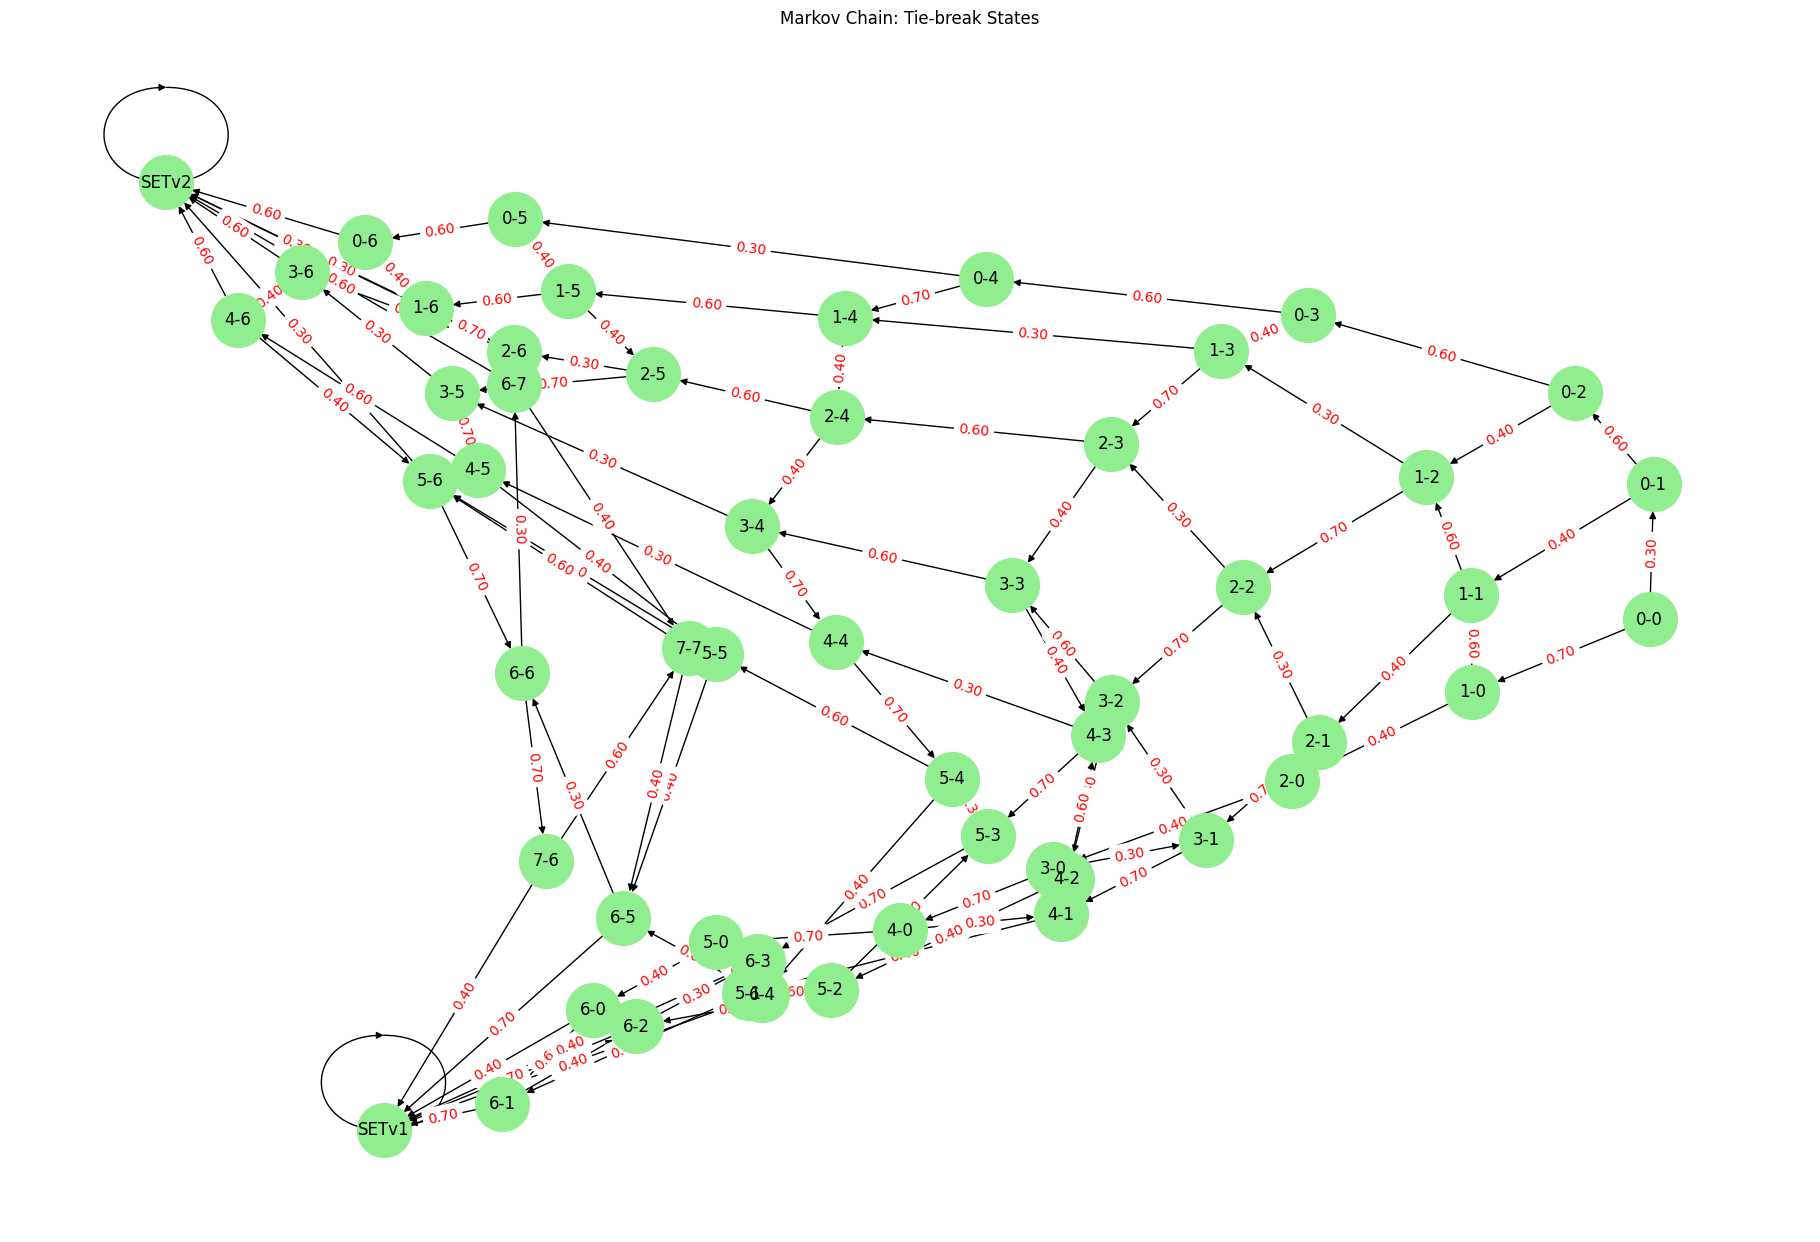

In [5]:
# II - Compute tie-break winning probabilities if score is s_tb
# (a) Starting from 0-0
result_tie = resTIE(ppoint_srv1=0.7, ppoint_srv2=0.6, s_tb=s0tb, graph=True)

In [6]:
# (b) Another example: Starting from 3-4
s_tb = s0tb.copy()
s_tb.loc[0, '0-0'] = 0
s_tb.loc[0, '3-4'] = 1
result_tie_3_4 = resTIE(ppoint_srv1=0.7, ppoint_srv2=0.6, s_tb=s_tb, graph=False)
sorted_cols = result_tie_3_4.iloc[0].sort_values(ascending=False).index
result_tie_3_4_sorted = result_tie_3_4[sorted_cols]
result_tie_3_4_sorted

,SETv1,SETv2,5-6,6-5,0-0,0-1,3-0,2-1,1-2,0-3,...,6-3,6-4,4-6,3-6,2-6,1-6,0-6,7-7,7-6,6-7
0,0.512497,0.487503,2.190879e-134,1.460586e-134,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


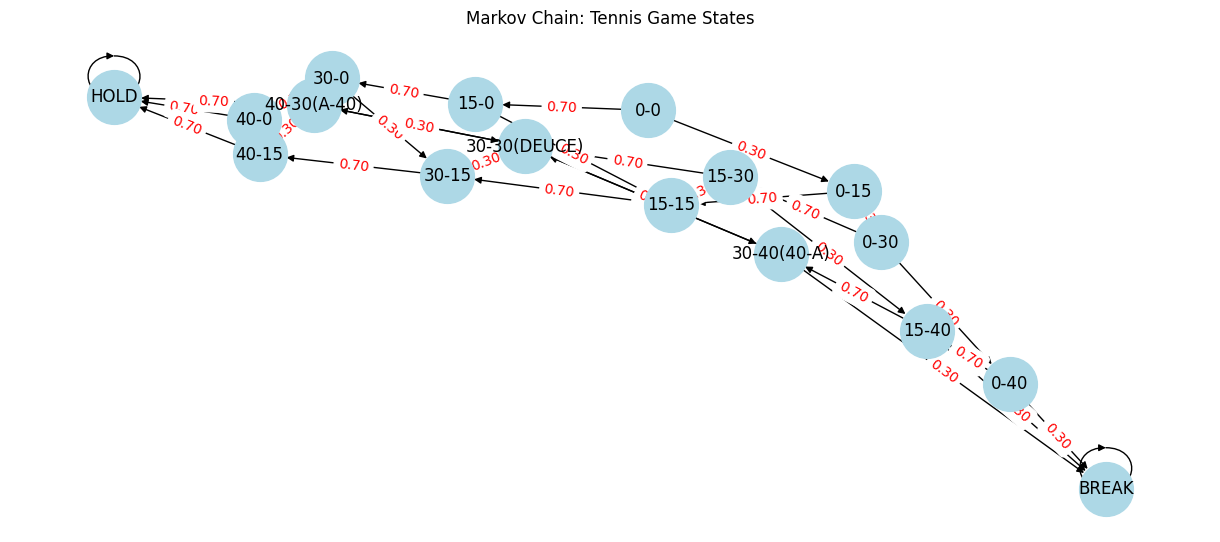

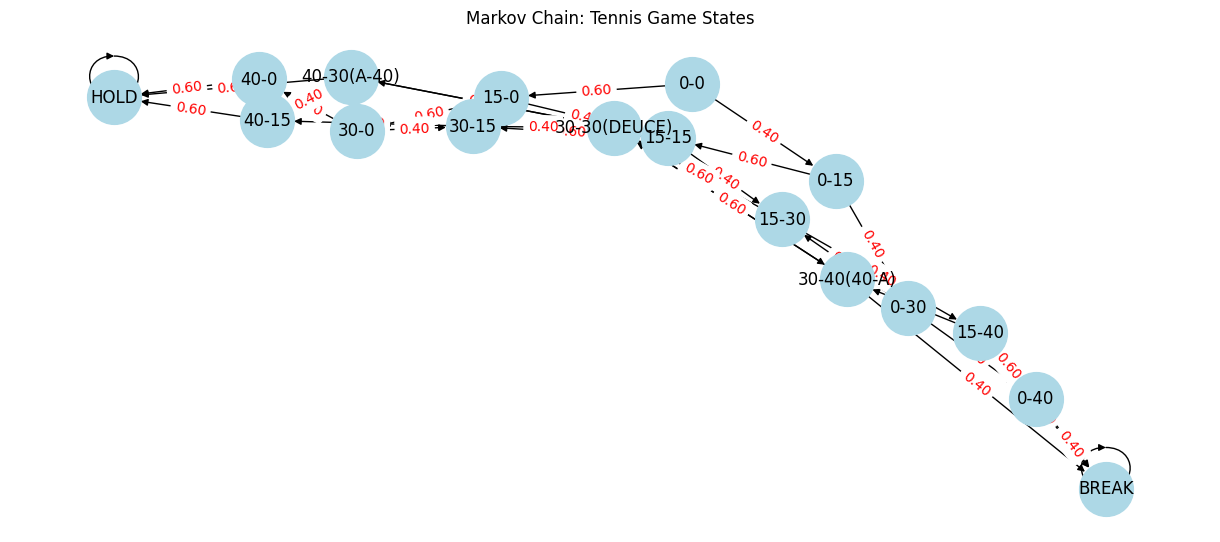

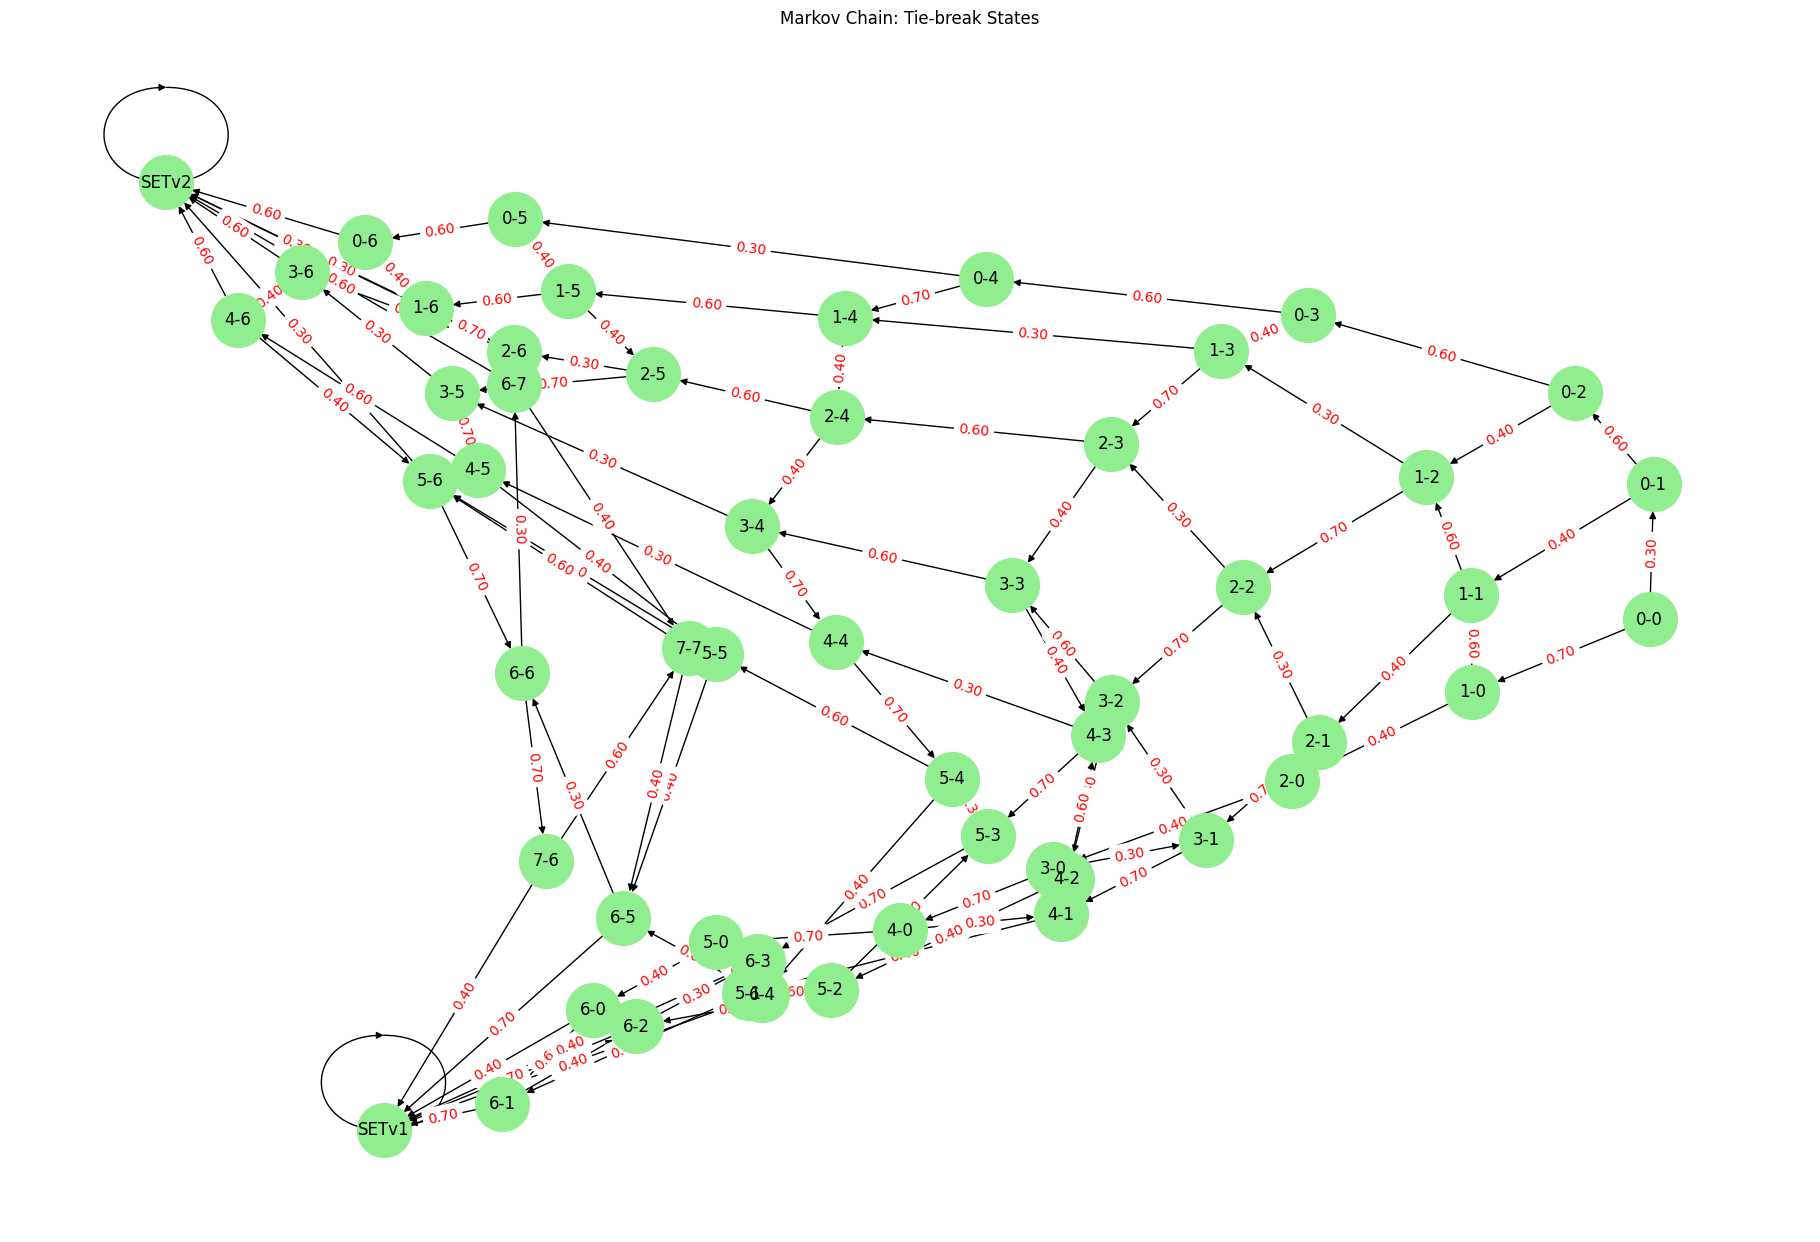

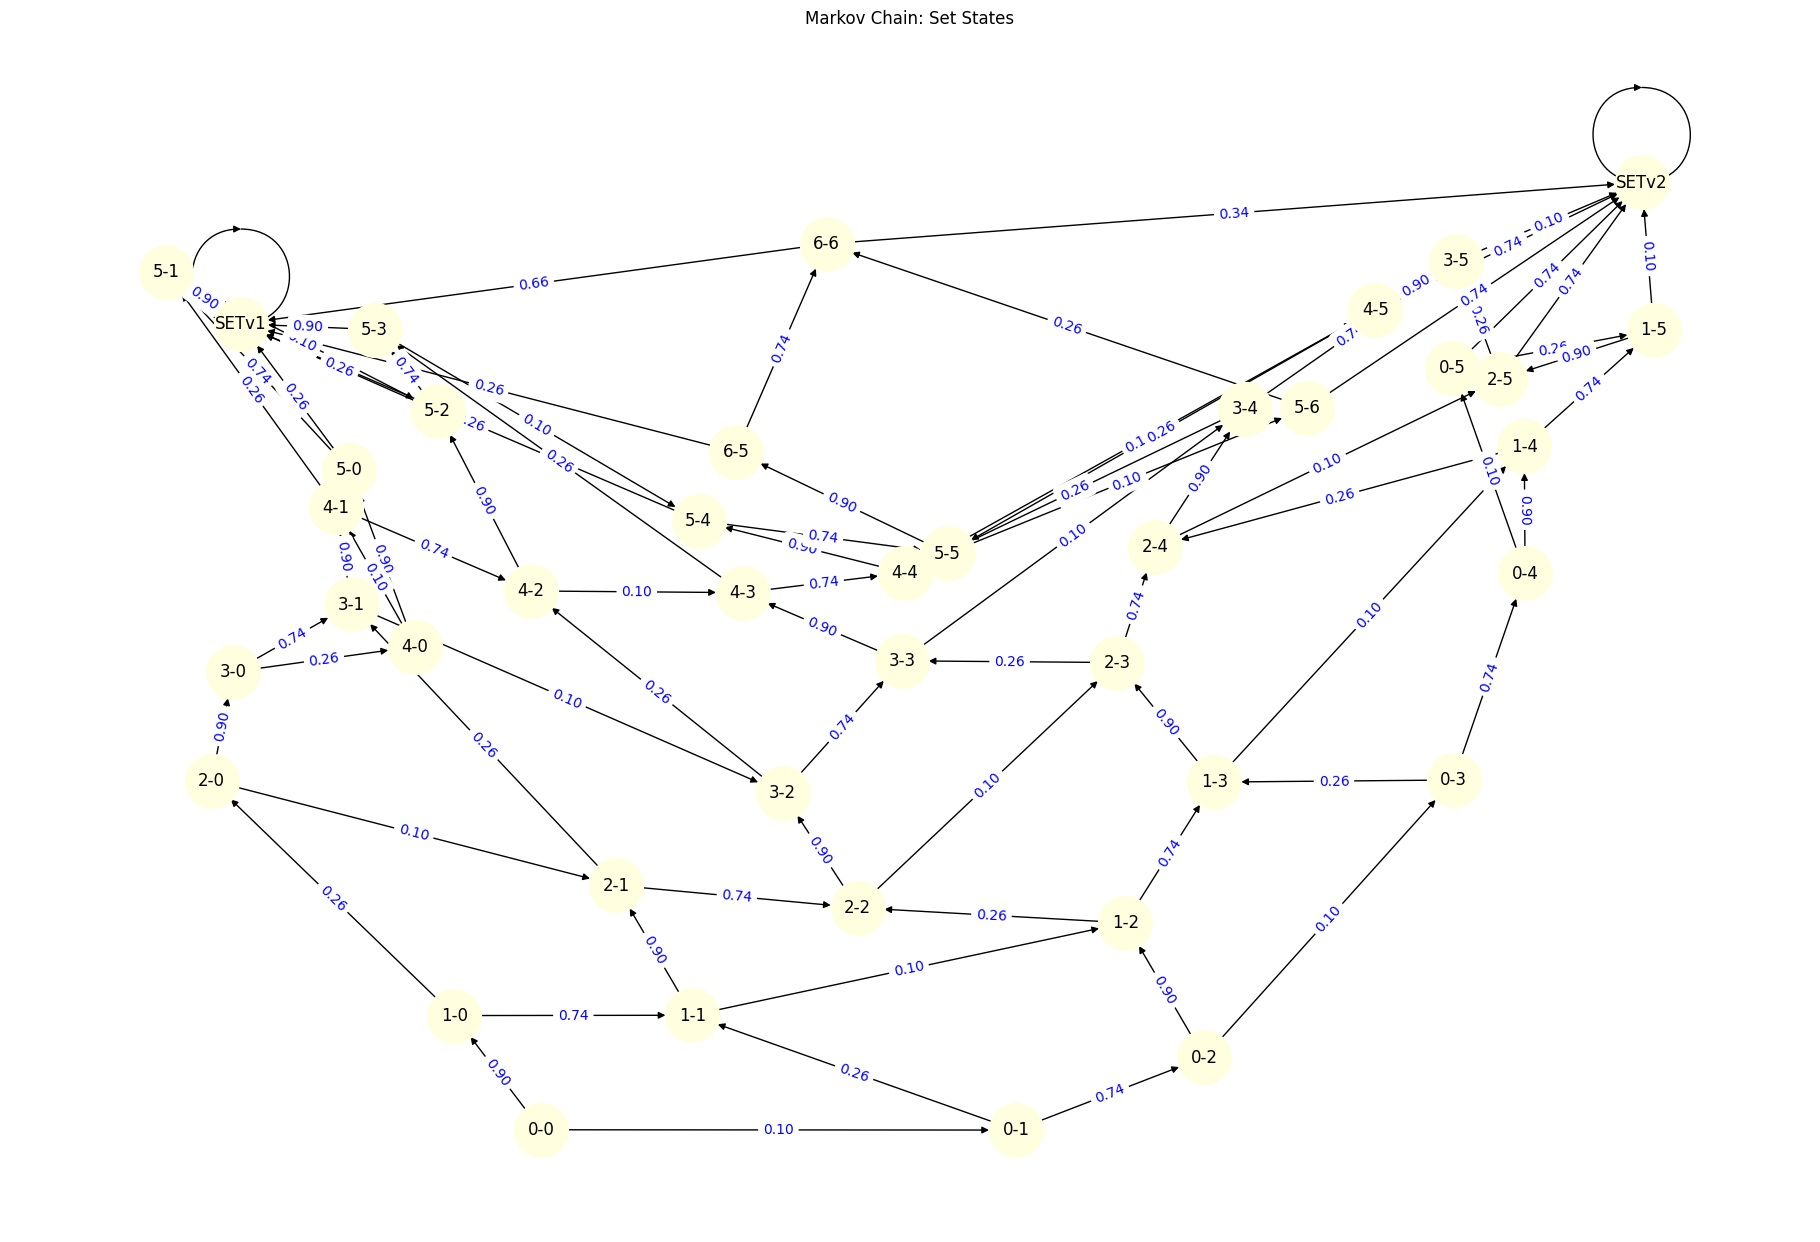

In [7]:
# III - Compute set winning probabilities if score is s_set
# (a) Starting from 0-0
phold1 = resGAME(ppoint_server=0.7, s_game=s0game, graph=True).loc[0, "HOLD"]
phold2 = resGAME(ppoint_server=0.6, s_game=s0game, graph=True).loc[0, "HOLD"]
ptie1 = resTIE(ppoint_srv1=0.7, ppoint_srv2=0.6, s_tb=s0tb, graph=True).loc[0, "SETv1"]
result_set = resSET(phold1=phold1, phold2=phold2, ptie1=ptie1, s_set=s0set, graph=True)

In [8]:
# (b) Another example: Starting from 4-5
s_set = s0set.copy()
s_set.loc[0, '0-0'] = 0
s_set.loc[0, '4-5'] = 1
phold1 = resGAME(ppoint_server=0.7, s_game=s0game, graph=False).loc[0, "HOLD"]
phold2 = resGAME(ppoint_server=0.6, s_game=s0game, graph=False).loc[0, "HOLD"]
ptie1 = resTIE(ppoint_srv1=0.7, ppoint_srv2=0.6, s_tb=s0tb, graph=False).loc[0, "SETv1"]
result_set_4_5 = resSET(phold1=phold1, phold2=phold2, ptie1=ptie1, s_set=s_set, graph=False)
result_set_4_5

,0-0,0-1,1-0,1-1,2-0,0-2,3-0,2-1,1-2,0-3,...,4-4,3-5,5-4,4-5,5-5,6-5,5-6,6-6,SETv1,SETv2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182304,0.817696


In [9]:
# (c) Another example: Starting from 0-5
s_set = s0set.copy()
s_set.loc[0, '0-0'] = 0
s_set.loc[0, '0-5'] = 1
phold1 = resGAME(ppoint_server=0.7, s_game=s0game, graph=False).loc[0, "HOLD"]
phold2 = resGAME(ppoint_server=0.6, s_game=s0game, graph=False).loc[0, "HOLD"]
ptie1 = resTIE(ppoint_srv1=0.7, ppoint_srv2=0.6, s_tb=s0tb, graph=False).loc[0, "SETv1"]
result_set_0_5 = resSET(phold1=phold1, phold2=phold2, ptie1=ptie1, s_set=s_set, graph=False)
result_set_0_5

,0-0,0-1,1-0,1-1,2-0,0-2,3-0,2-1,1-2,0-3,...,4-4,3-5,5-4,4-5,5-5,6-5,5-6,6-6,SETv1,SETv2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010331,0.989669


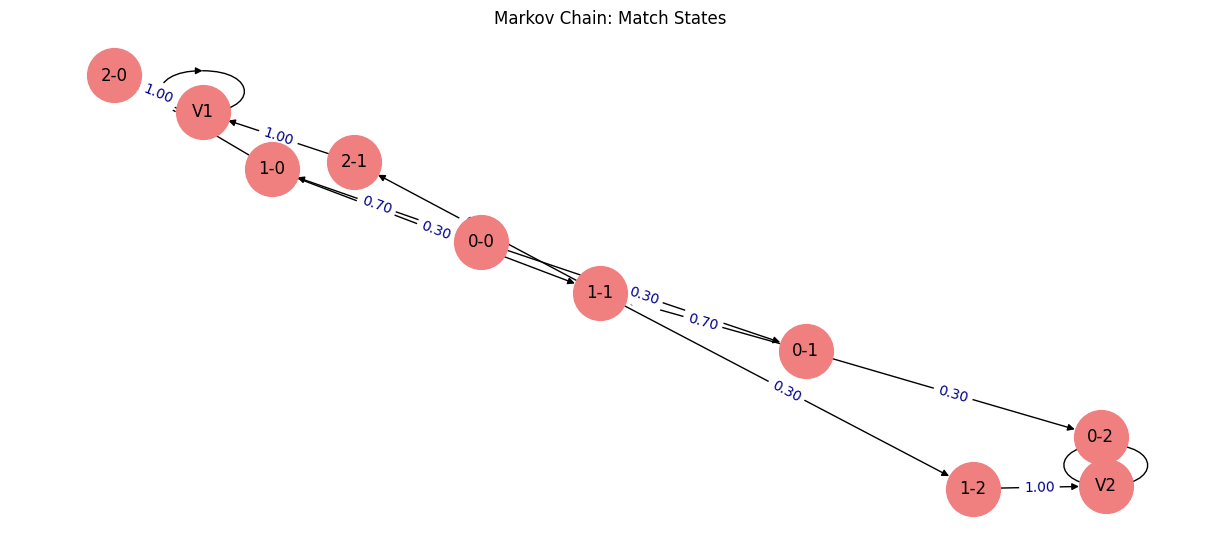

In [10]:
# IV - Compute match winning probabilities if score is s_match
# (a) Starting from 0-0
result_match = resMATCH(pset_v1=0.7, s_match=s0match, graph=True)

In [11]:
# (b) Another example: Starting from 0-1
s_match = s0match.copy()
s_match.loc[0, '0-0'] = 0
s_match.loc[0, '0-1'] = 1
result_match_0_1 = resMATCH(pset_v1=0.7, s_match=s_match, graph=False)
result_match_0_1

,0-0,0-1,1-0,1-1,2-0,0-2,2-1,1-2,V1,V2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.51


In [12]:
# (c) Another example: Starting from 1-0
s_match = s0match.copy()
s_match.loc[0, '0-0'] = 0
s_match.loc[0, '1-0'] = 1
result_match_1_0 = resMATCH(pset_v1=0.7, s_match=s_match, graph=False)
result_match_1_0

,0-0,0-1,1-0,1-1,2-0,0-2,2-1,1-2,V1,V2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91,0.09


In [13]:
# V - Compute probabilities of victory from a given score
result_determi = determiMM(
    ppoint_srv1=0.7,
    ppoint_srv2=0.6,
    setscore='1-0',
    gamescore='0-1',
    s0match=s0match,
    s0set=s0set,
    s0game=s0game,
    s0tb=s0tb
)
result_determi

Let's modelize this match from the score: 1-0 Sets, 0-1 Games


,0-0,0-1,1-0,1-1,2-0,0-2,2-1,1-2,V1,V2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.903328,0.096672


In [14]:
result_determi = determiMM(
    ppoint_srv1=0.7,
    ppoint_srv2=0.6,
    setscore='0-0',
    gamescore='1-5',
    s0match=s0match,
    s0set=s0set,
    s0game=s0game,
    s0tb=s0tb
)
result_determi

Let's modelize this match from the score: 0-0 Sets, 1-5 Games


,0-0,0-1,1-0,1-1,2-0,0-2,2-1,1-2,V1,V2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64243,0.35757


In [15]:
result_determi = determiMM(
    ppoint_srv1=0.7,
    ppoint_srv2=0.6,
    setscore='0-1',
    gamescore='4-4',
    s0match=s0match,
    s0set=s0set,
    s0game=s0game,
    s0tb=s0tb
)
result_determi

Let's modelize this match from the score: 0-1 Sets, 4-4 Games


,0-0,0-1,1-0,1-1,2-0,0-2,2-1,1-2,V1,V2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566008,0.433992
